# Introdução

Bom no notebook [Análise Exploratória](https://github.com/ConradBitt/Deteccao_Fraudes/blob/master/Analise_Exploratoria.ipynb) realizamos uma análise exploratória e alguns pré processamentos nos dados, a fim de identificar a região de cada IP em cada transação financeira. Com certeza esse passo foi importante para uma análise mais descritiva e categórica, entretanto não é o único. Agora vamos aos próximos passos, dado que temos dados de transações e seus países vamos definir algumas hipótesesa para serem testadas.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl
import scipy 
import itertools
import datetime


from matplotlib import pyplot as plt
from scipy import special
from datetime import timedelta

In [2]:
print('~~ Versão Python ~~')
!python --version

print('\n\n~~ Versões Módulos ~~')

print(f'numpy: {np.__version__}')
print(f'pandas: {pd.__version__}')
print(f'seaborn: {sns.__version__}')
print(f'matplotlib: {mpl.__version__}')
print(f'scipy: {scipy.__version__}')

~~ Versão Python ~~
Python 3.7.9


~~ Versões Módulos ~~
numpy: 1.20.1
pandas: 1.2.4
seaborn: 0.11.1
matplotlib: 3.3.4
scipy: 1.6.2


In [3]:
plt.style.use('bmh')
sns.set_context('talk')

# Importando os dados

In [4]:
transacoes = pd.read_csv('./dados/Transacoes_Fraudes.csv', header = 0)

In [5]:
transacoes.head(10)

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,missing_country
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0,missing_country
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0,United States
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0,China
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0,United States


# Análise exploratória

Podemos verificar que as variáveis são:

In [6]:
transacoes.columns

Index(['id', 'cadastro', 'compra', 'valor', 'id_dispositivo', 'fonte',
       'browser', 'genero', 'idade', 'ip', 'fraude', 'pais'],
      dtype='object')

Um ponto importante é que temos uma variável chamada `id`, que provavelmente é um identificador. Outras delas são qualitativas, oustras quantitativas, existem até variáveis pessoais como por exemplo `sexo` e `idade`. Então tendo em vista esses dados, vou analisar algumas caracteristicas de cada uma dessas variáveis.


## Mudando tipo do da variavel cadastro

In [7]:
transacoes.cadastro = pd.to_datetime(transacoes.cadastro)
transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              151112 non-null  int64         
 1   cadastro        151112 non-null  datetime64[ns]
 2   compra          151112 non-null  object        
 3   valor           151112 non-null  int64         
 4   id_dispositivo  151112 non-null  object        
 5   fonte           151112 non-null  object        
 6   browser         151112 non-null  object        
 7   genero          151112 non-null  object        
 8   idade           151112 non-null  int64         
 9   ip              151112 non-null  float64       
 10  fraude          151112 non-null  int64         
 11  pais            151112 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 13.8+ MB


## Mudando tipo do da variavel compra

In [8]:
transacoes.compra = pd.to_datetime(transacoes.compra)
transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              151112 non-null  int64         
 1   cadastro        151112 non-null  datetime64[ns]
 2   compra          151112 non-null  datetime64[ns]
 3   valor           151112 non-null  int64         
 4   id_dispositivo  151112 non-null  object        
 5   fonte           151112 non-null  object        
 6   browser         151112 non-null  object        
 7   genero          151112 non-null  object        
 8   idade           151112 non-null  int64         
 9   ip              151112 non-null  float64       
 10  fraude          151112 non-null  int64         
 11  pais            151112 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 13.8+ MB


## Analisando valores das transações

### Distribuição dos valores 

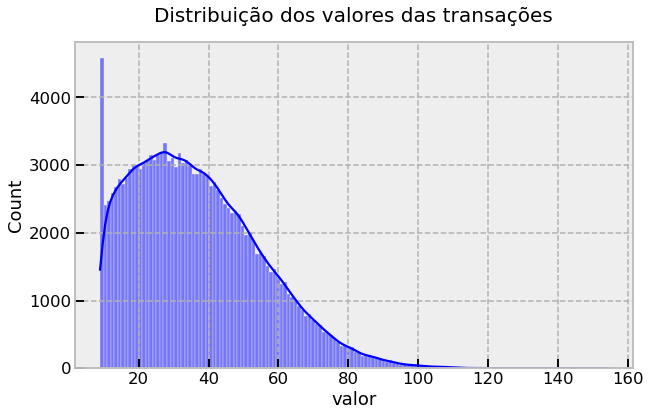

In [9]:
plt.figure(figsize=(10,6))
plt.title('Distribuição dos valores das transações', fontsize=20, pad=20)
ax = sns.histplot(x = 'valor', data=transacoes, kde=True);

> É possível verificar que a distribuição dos valores gastos não é uma distribuição conhecida.

### Distribuição dos valores por fraude

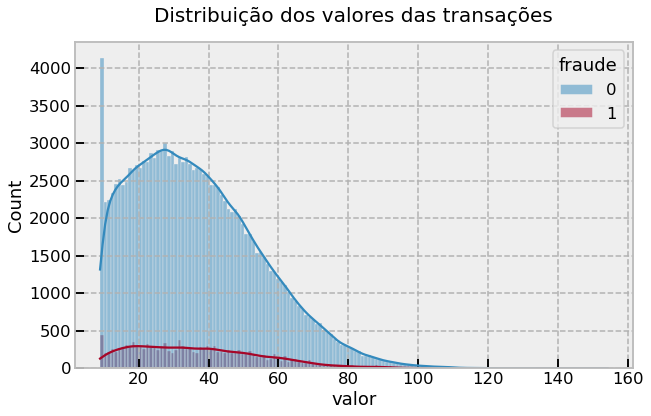

In [10]:
plt.figure(figsize=(10,6))
plt.title('Distribuição dos valores das transações', fontsize=20, pad=20)
ax = sns.histplot(x = 'valor', hue='fraude', data=transacoes, kde=True);

> Note que a proporção de fraudes perante perante a quantidade de transações reais é muito menor.

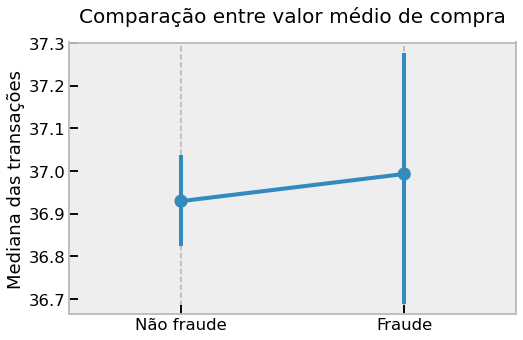

In [11]:
plt.figure(figsize=(8,5))
plt.title('Comparação entre valor médio de compra', fontsize=20, pad=20)
ax = sns.pointplot(x='fraude', y='valor', data=transacoes)
plt.ylabel('Mediana das transações')
plt.xlabel('')

ax.set_xticklabels(['Não fraude', 'Fraude'])
ax.grid()
ax;

> Note que a dispersão dos valores de transações fraudulentas são muito maiores do que a dispersão das transações reais, entretanto a mediano dos valores de compra das transações é relativamente proximo, não varia nem R$0,10.

## Histograma da variável `fonte`

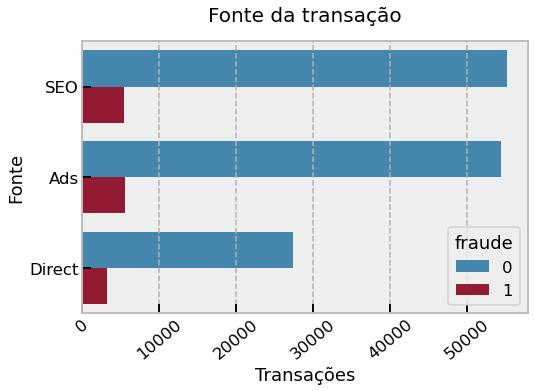

Tabela cruzada Fraude de
acordo com fonte da transação (%)



fonte,Ads,Direct,SEO
fraude,,,
0,90.79,89.46,91.07
1,9.21,10.54,8.93


*Normalizado pela fonte.



In [12]:
plt.figure(figsize=(8,5))
plt.title('Fonte da transação', fontsize=20, pad=20)
ax = sns.countplot(y='fonte', hue='fraude', data=transacoes)
ax.set_ylabel('Fonte')
ax.set_xlabel('Transações')
plt.xticks(rotation=40)
plt.show()


print('Tabela cruzada Fraude de\nacordo com fonte da transação (%)\n')
display((pd.crosstab(transacoes.fraude, transacoes.fonte, normalize='columns') * 100).round(2))
print('*Normalizado pela fonte.\n')


> Podemos inferir que visualmente não faz diferença a fonte da transação real ou fraudulenta. Abaixo coloquei uma tabela indicando a fonte da transação e a proporção de transações reais e falsas. É possível verificar que das transações cuja fonte é `Direct` 89.46% é real e 10.54% é falsa.

## Histrograma dos `browsers`

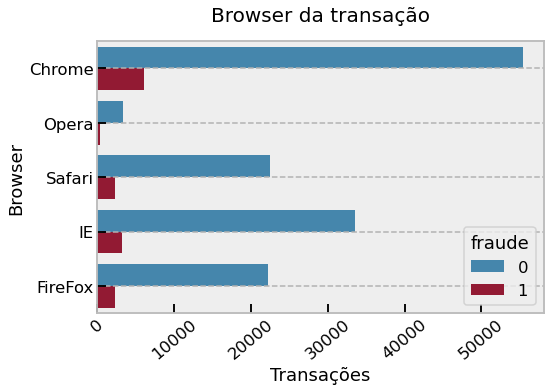

Tabela cruzada Fraude de
acordo com o browser (%)



browser,Chrome,FireFox,IE,Opera,Safari
fraude,,,,,
0,90.12,90.48,91.32,91.08,90.98
1,9.88,9.52,8.68,8.92,9.02


*Normalizado pelo tipo do browser


In [13]:
plt.figure(figsize=(8,5))
plt.title('Browser da transação', fontsize=20, pad=20)
ax = sns.countplot(y='browser', hue='fraude', data=transacoes)
ax.set_ylabel('Browser')
ax.set_xlabel('Transações')
plt.xticks(rotation=40)
plt.grid()
plt.show()

print('Tabela cruzada Fraude de\nacordo com o browser (%)\n')
display((pd.crosstab(transacoes.fraude, transacoes.browser, normalize='columns') * 100).round(2))
print('*Normalizado pelo tipo do browser')


> Novamente, a proporção entre fraude e transações reais se mantém. Geralmente 10% das transações são falsas e outro 90% são transações reais, independente do navegador (browser) utilizado.

## Fraudes por gênero 

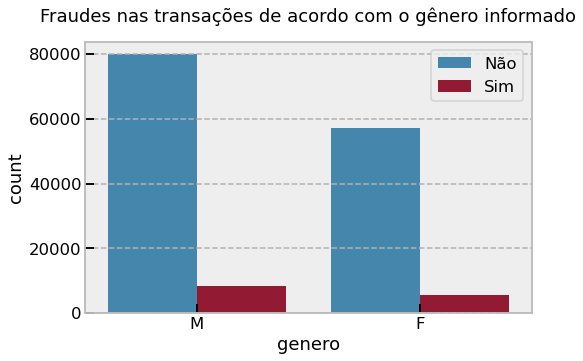

Tabela cruzada Fraude de
acordo com gênero informado (%)



genero,F,M
fraude,,
0,90.9,90.45
1,9.1,9.55


*Normalizado pelo gênero informado


In [14]:
plt.figure(figsize=(8,5))
plt.title('Fraudes nas transações de acordo com o gênero informado', fontsize=18, pad=20)
ax = sns.countplot(x='genero', hue='fraude', data=transacoes)
ax.legend(['Não', 'Sim'])
plt.show()

print('Tabela cruzada Fraude de\nacordo com gênero informado (%)\n')
display((pd.crosstab(transacoes.fraude, transacoes.genero, normalize='columns') * 100).round(2))
print('*Normalizado pelo gênero informado')

> Podemos ver que a quantidade de trnsações realizada por homens é maior do que a realizada por mulheres, entretanto de forma visual parece que a quantidade de fraudes não depende do sexo.

> Por isso fiz uma tabela cruzada, entre genero e fraude, onde é possível concluir que, do gênero F 90.9% das transações são reais e 9.1% são fraudes, já no gênero M 90.45% das transações são reais e 9.55% são fraudes. 

> Logo, aproximadamente de 9% de todas as transações são fraudes.

## Transações por país


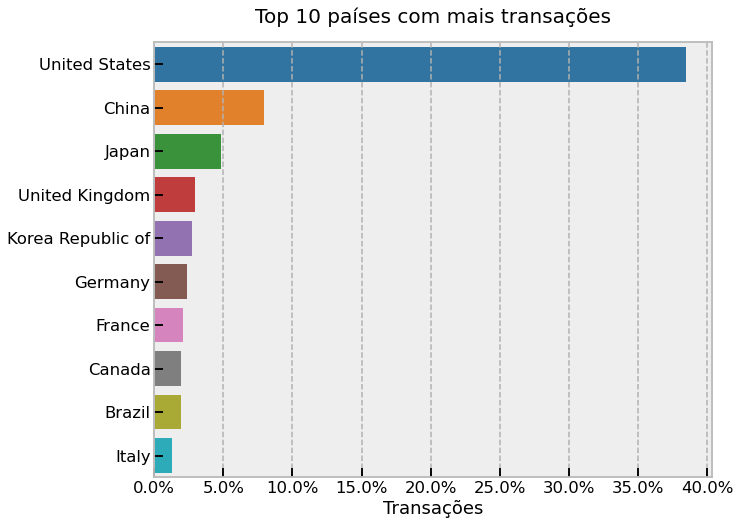

In [15]:
from matplotlib import ticker

paises_10_maiores_transacoes = transacoes.pais.value_counts(ascending=False, 
                                                            normalize=True).drop('missing_country',
                                                                                 axis=0).to_frame()[:10]*100

plt.figure(figsize=(10,8))
plt.title('Top 10 países com mais transações', fontsize=20, pad=20)
ax = sns.barplot(x='pais', y = paises_10_maiores_transacoes.index,  data=paises_10_maiores_transacoes, palette='tab10')
ax.set_xlabel('Transações',)
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
ax;

> É possível verificar que mais de 35% das transações acontecem nos Estados Unidos. Entretanto, **não podemos utilizar isso como um fator determinante para classificar se uma transação é fraude ou não**, precisamos dar um jeito de "padronizar" para que as variáveis fiquem proporcionais.

# Analises entre variáveis
## Análise de ID e IP 

Agora que fizemos algumas visualizações e consideraçoes nos dados sem altera-los propriamente dito, vamos fazer algumas manipulações para correlacionar variaveis. 

Primeiramente vou avaliar os usuários que estão relacionados à apena um endereço de IP

> **objetivo**: contar o número fraudes para cada dispositivo e ip

In [16]:
fraude_por_dispositivo_ip = pd.DataFrame(columns=['fraude','id_por_dispositivo','id_por_ip'])

Para o número de fraudes temos:

In [17]:
fraude_por_dispositivo_ip['fraude'] = transacoes['fraude']
fraude_por_dispositivo_ip.head()

,fraude,id_por_dispositivo,id_por_ip
0,0,NaN,NaN
1,0,NaN,NaN
2,1,NaN,NaN
3,0,NaN,NaN
4,0,NaN,NaN


Para o numero de dispositivos por id temos:

In [18]:
# Agrupa por dispositivos e count() na variável id
id_por_dispositivos = transacoes.groupby('id_dispositivo').id.count()
id_por_dispositivos.head()

id_dispositivo
AAALBGNHHVMKG     1
AAAWIHVCQELTP     1
AAAXJHWCLISKY     1
AAAXXOZJRZRAO    11
AABFGRPBQHWFQ     1
Name: id, dtype: int64

Veja que um único dispositivo tem 11 `id`. Então agora para cada dispositivo em `transações` vamos adicionar a quantidade de `id` que esse dispositivo tem no dataframe `fraude_por_dispositivo_ip`:

In [19]:
def retorta_id_por_dispositivo(id_dispositivo):
    quantidade_id = id_por_dispositivos.loc[id_dispositivo]
    return quantidade_id

# testando
retorta_id_por_dispositivo('AAAXXOZJRZRAO')

11

Deu certo, agora vamos aplicar definitivamente

In [20]:
fraude_por_dispositivo_ip['id_por_dispositivo'] = transacoes.id_dispositivo.apply(retorta_id_por_dispositivo)
fraude_por_dispositivo_ip.head()

,fraude,id_por_dispositivo,id_por_ip
0,0,1,NaN
1,0,1,NaN
2,1,12,NaN
3,0,1,NaN
4,0,1,NaN


Veja que deu certo, um único dispositivo tem 12 `id` e a classificação dele é de fraude. 

Agora vamos contar quantos `id` tem cada `ip` agrupando pelo numero de `ip` e contando quandos `id` estão associados a ele:

In [21]:
id_por_ips = transacoes.groupby('ip').id.count()
id_por_ips

ip
5.209350e+04    1
9.344714e+04    1
1.058185e+05    1
1.175667e+05    1
1.314238e+05    1
               ..
4.294674e+09    1
4.294715e+09    1
4.294720e+09    1
4.294822e+09    1
4.294850e+09    1
Name: id, Length: 143512, dtype: int64

In [22]:
def retorna_id_por_ip(ip):
    quantidade_id = id_por_ips[ip]
    return quantidade_id

# testando
retorna_id_por_ip(transacoes.ip.iloc[50])

1

>**observação**: O fato do IP ser um int pode dificultar ao chamar ele através do índex de uma `Series` ou `DataFrame`.


Agora vamos aplicar para cada `ip` em `transacoes` ver quantos `id` estão associados:

In [23]:
fraude_por_dispositivo_ip['id_por_ip'] = transacoes.ip.apply(retorna_id_por_ip)
fraude_por_dispositivo_ip

,fraude,id_por_dispositivo,id_por_ip
0,0,1,1
1,0,1,1
2,1,12,12
3,0,1,1
4,0,1,1
...,...,...,...
151107,1,2,1
151108,0,1,1
151109,0,1,1
151110,0,2,1


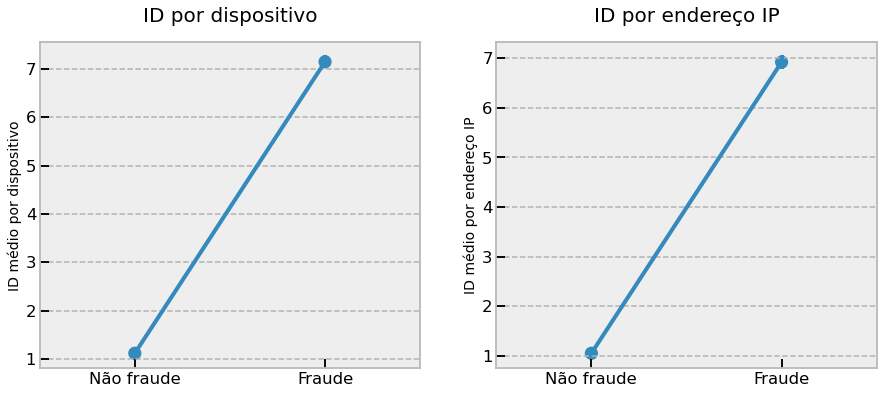

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('ID por dispositivo', fontsize=20, pad=20)
ax1 = sns.pointplot(data = fraude_por_dispositivo_ip, x = 'fraude', y = 'id_por_dispositivo')
ax1.set_xticklabels(['Não fraude', 'Fraude'])
ax1.set_xlabel('')
ax1.set_ylabel('ID médio por dispositivo', fontsize=14)


plt.subplot(122)
plt.title('ID por endereço IP', fontsize=20, pad=20)
ax2 = sns.pointplot(data = fraude_por_dispositivo_ip, x = 'fraude', y = 'id_por_ip')
ax2.set_xlabel('')
ax2.set_xticklabels(['Não fraude', 'Fraude'])
ax2.set_ylabel('ID médio por endereço IP', fontsize=14)

plt.show()

### Comentário sobre análise de ID e IP por dispositivo

> É possivel verificar que **a média de ID por dispositivo é um** na primeira imagem onde indica transações reais, acontece que para **transações classificadas como fraude a média é de 7 id por dispositivos**. Ou seja, a quantidade de `id_por_dispositivo` é importante para decidir se as transações são fraudes ou não.

> Para o caso de ID por endereços de IP acontece algo parecido, em geral **transações reais tem em média um IP por IP** já as **transações fraudulentas tem em média 7 ID's por endereços IP**. Portanto, a quantidade de IP por dispositivo também é um indicador de fraude nestes dados.

## Análise de inscrição e tempo de compra

Dado que temos disponíveis informações sobre cadastro e hora de transação, podemos fazer algumas análises referênte a essa variação entre cadastro e compra.

A nova variável sera a diferença entre o tempo de compra e o cadastro:

In [25]:
transacoes['compra'] - transacoes['cadastro']

0        52 days 03:51:22
1         0 days 04:59:04
2         0 days 00:00:01
3         5 days 16:41:25
4        50 days 11:31:01
               ...       
151107   60 days 21:27:13
151108   10 days 18:41:10
151109   77 days 08:00:16
151110   59 days 13:28:39
151111   40 days 19:01:33
Length: 151112, dtype: timedelta64[ns]

Note que essa diferença é dada em dias, podemos converte-la em segundos através do atributo `datetime.seconds` de cada elemento do objeto `datetime`:

In [26]:
transacoes['tempo'] = (transacoes['compra'] - transacoes['cadastro']).apply(lambda delta_tempo: delta_tempo.seconds)
transacoes['tempo']

0         13882
1         17944
2             1
3         60085
4         41461
          ...  
151107    77233
151108    67270
151109    28816
151110    48519
151111    68493
Name: tempo, Length: 151112, dtype: int64

Agora temos a quantidade em segundos e podemos verificar se este valor tem alguma correlação entre as fraudes:

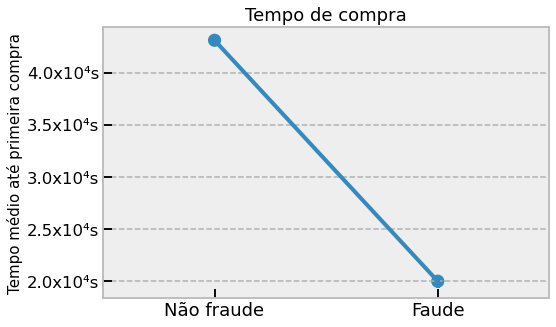

In [27]:
plt.title('Tempo de compra')
ax = sns.pointplot(data = transacoes, x = 'fraude', y = 'tempo')
ax.figure.set_size_inches(8,5)
ax.set_ylabel('Tempo médio até primeira compra', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['Não fraude','Faude'], fontsize=18)
ax.yaxis.set_major_formatter(lambda x, pos: f'{(x / 10000)}x10⁴s')
ax;

### Comentário sobre o tempo de compra

> Note que as **transações reais geralmente demoram algum tempo para que seja feita alguma compra**, diferente das **transações fraudulentas que geralmente tem um tempo menor**. Portanto, pode ser o caso de existir uma correlação inversa: Quanto maior o tempo até a primeira compra, menor a chance de ser uma fraude.

É possível analisar também em que horas as fraudes costumam à acontecer:

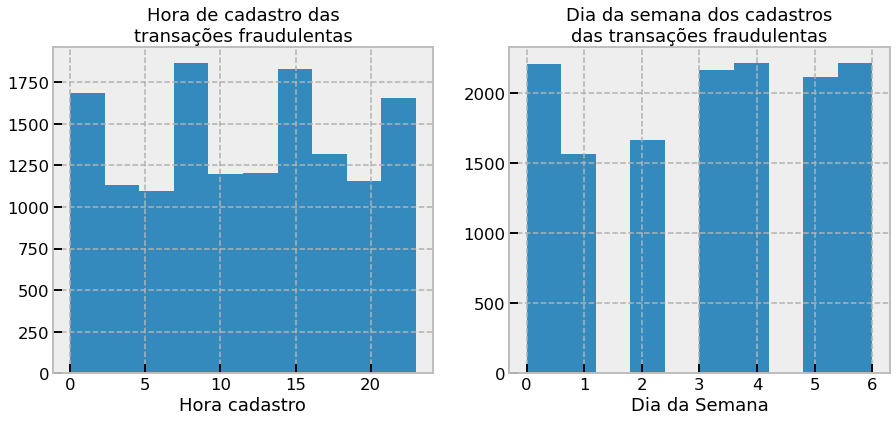

In [28]:

plt.figure(figsize=(15,6))
ax1 = plt.subplot(121)
ax1.set_title('Hora de cadastro das\ntransações fraudulentas')
ax1 = transacoes[transacoes.fraude == 1 ].cadastro.apply(lambda x: x.hour).hist()
ax1.set_xlabel('Hora cadastro')

ax2 = plt.subplot(122)
ax2.set_title('Dia da semana dos cadastros\ndas transações fraudulentas')
ax2 = transacoes[transacoes.fraude == 1 ].cadastro.apply(lambda x: x.dayofweek).hist()
ax2.set_xlabel('Dia da Semana')

plt.show()

Podemos verificar também se ocorrem fraudes ao longo das semanas do ano, uma hipotese:

> **Aumentam as fraudes em semanas de eventos festivos/liquidações**

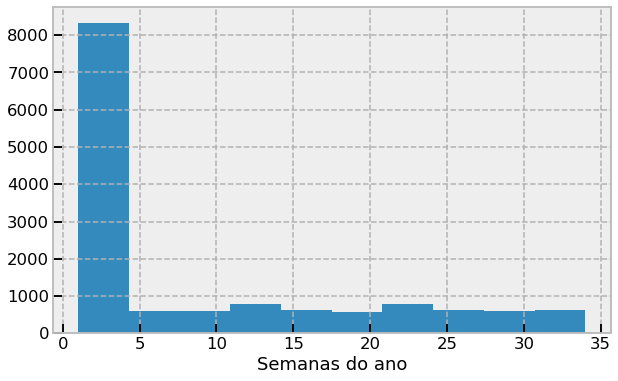

In [29]:
plt.figure(figsize=(10,6))
ax = transacoes[transacoes.fraude == 1 ].cadastro.apply(lambda x: x.week).hist()
ax.set_xlabel('Semanas do ano')

ax;

### Comentário sobre as fraudes em função das semanas do ano

> Note que a quantidade de fraudes nas três primeiras semanas do ano são bem maiores do que as outras, ou seja, as semanas de cadastros de contas podem ser um indicador de fraudes, entretanto não sabemos se é um critério definitivo, porque é possível que mais pessoas criem contas neste período por causa de "sobras de natal e ano novo". Então o melhor a se fazer é indicar ao setor de segurança quê **durante o primeiro mês do ano, mais precisamente durante as três primeiras semanas, a quantidade de fraudes aumenta vertiginosamente, logo é importante reforçar o atendimento ao cliente e sistemas de segurança neste periogo**

# Engenhearia de recursos/variáveis

Depois de verificar quais variáveis são mais importantes do que outras, em alguns casos é provável que tenha que se criar variáveis a partir das informações que a gente tem. Por exemplo, criamos duas variáveis, a quantidade de ID por dispositivos e a quantidade de IP por ID, em que essas são bons indicadores de fraude, entretanto são dados que estão correlacionados.

Para evitar multicolinearidade vou produzir apenas um recurso que vai ser a média do número de ID por dispositivos ou a média de ID por IP 

In [30]:
def retorta_id_por_dispositivo(id_dispositivo):
    quantidade_id = id_por_dispositivos.loc[id_dispositivo]
    return quantidade_id

def retorta_id_por_ip(ip):
    quantidade_id = id_por_ip.loc[ip]
    return quantidade_id

id_por_dispositivos = transacoes.groupby('id_dispositivo').id.count()
id_por_ip = transacoes.groupby('ip').id.count()


transacoes['id_por_dispositivo'] = transacoes.id_dispositivo.apply(retorta_id_por_dispositivo)
transacoes['id_por_ip'] = transacoes.ip.apply(retorta_id_por_ip)

In [31]:
transacoes

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,tempo,id_por_dispositivo,id_por_ip
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,missing_country,60085,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,77233,2,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,67270,1,1
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,28816,1,1
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,48519,2,1


Agora que temos as duas variáveis no dataframe `transacoes` vou criar outra variável:

$$\text{media id} = \frac{\text{id por dispositivo }+\text{ id por IP}}{2}$$

In [32]:
transacoes['media_id'] = (transacoes['id_por_dispositivo'] + transacoes['id_por_ip']) / 2

In [33]:
transacoes

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,tempo,id_por_dispositivo,id_por_ip,media_id
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,1,1,1.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1,1,1.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12,12,12.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,missing_country,60085,1,1,1.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,77233,2,1,1.5
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,67270,1,1,1.0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,28816,1,1,1.0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,48519,2,1,1.5


## Quebrar a variável `pais` em varias variaveis

Precisamos fazer um processo de "pivot" na variável `pais` ou o processo *dummies*, que é basicamente transformar cada uma das categorias (paises) em uma variável, isso irá gerar uma matriz esparsa, veja, vou transformar países em uma variável:

In [34]:
paises = pd.get_dummies(transacoes.pais, prefix='pais')
paises

,pais_Afghanistan,pais_Albania,pais_Algeria,pais_Angola,pais_Antigua and Barbuda,pais_Argentina,pais_Armenia,pais_Australia,pais_Austria,pais_Azerbaijan,...,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe,pais_missing_country
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Agora o que é preciso fazer é concatenar as variaveis `paises` com as `transacoes`:

In [35]:
transacoes = pd.concat([transacoes, paises], axis=1)

In [36]:
transacoes.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,...,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe,pais_missing_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,0,0,0,0,0,0,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,0,0,0,0,0,0,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,0,0,0,0,0,0,0,0,0,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,...,0,0,0,0,0,0,0,0,0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,0,0,0,0,0,0,0,0,0,0


Note que agora temos 198 colunas... E diferente do problema anterior precisamos de alguma forma condensar ou remover algumas counas.

A principo vou utilizar a função drop para remover algumas variáveis, por exemplo a `pais`. As variáveis a serem removidas são todas as analisadas na Análise exploratória exceto `media_id` que construimos:




In [37]:
transacoes = transacoes.drop(['id','cadastro','compra','valor','fonte',
                             'browser', 'genero','idade', 'id_dispositivo','ip','id_por_dispositivo',
                             'id_por_ip', 'pais'], axis=1)
transacoes.head()

,fraude,tempo,media_id,pais_Afghanistan,pais_Albania,pais_Algeria,pais_Angola,pais_Antigua and Barbuda,pais_Argentina,pais_Armenia,...,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe,pais_missing_country
0,0,13882,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,17944,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,12.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,60085,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,41461,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Distribuições de variáveis gaussianas
### Analise de fraudes e transações reais

Os modelos geralmente se ajustam melhor a variáveis que se distribuiem normalmente, podemos verificar que algumas das variáveis são bimodais, por exemplo a `media_id`, isso porque tem uma média associada aos valores de fraude e outra média associada aos valores reais.

In [38]:
transacoes_reais = transacoes.query('fraude == 0')
transacoes_fraude = transacoes.query('fraude == 1')

print('Media Fraude:\t\t',transacoes_reais['media_id'].mean())
print('Media Transações reais: ',transacoes_fraude['media_id'].mean())

Media Fraude:		 1.0865757405392775
Media Transações reais:  7.034167196664547


Isso pode ser visualizado mais facilmente com dois histogramas:

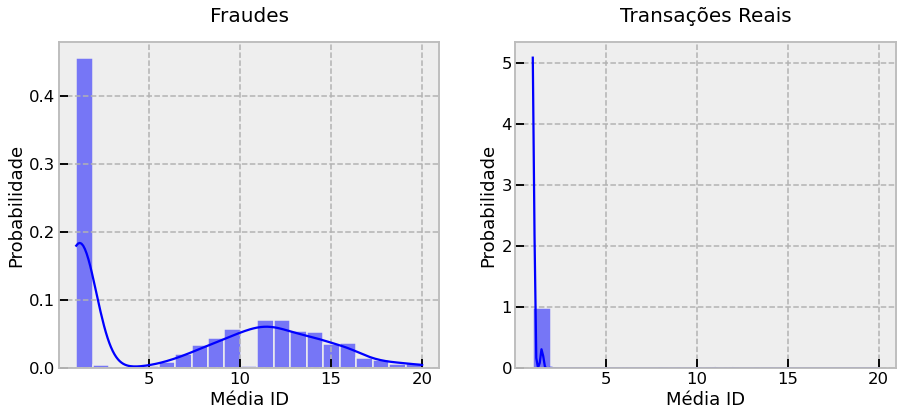

In [39]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Fraudes', fontsize=20, pad=20)
ax = sns.histplot(data = transacoes_fraude, x='media_id', kde=True, stat='probability')
ax.set_xlabel('Média ID', fontsize=18)
ax.set_ylabel('Probabilidade')

plt.subplot(122)
plt.title('Transações Reais', fontsize=20, pad=20)
ax = sns.histplot(data = transacoes_reais, x='media_id', kde=True, stat='probability')
ax.set_xlabel('Média ID', fontsize=18)
ax.set_ylabel('Probabilidade')


plt.show()

> Note que a diferença entre as distribuições é bem diferente. Aliás, a distribuição da média dos ID em casos de fraude é nitidamente bimodal. Não tem muito o que se possa fazer a respeito disso a não ser normalizar esta variável.

### Analise do `tempo`

O que podemos fazer também é analisar o tempo que é a diferença entre o momento de compra e o momento de cadastro

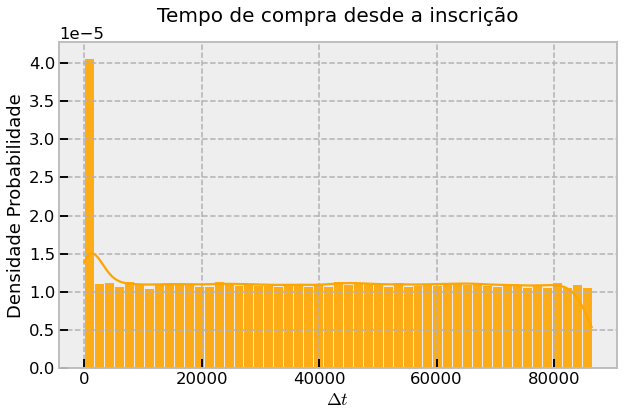

In [40]:
plt.figure(figsize=(10,6))
plt.title('Tempo de compra desde a inscrição', fontsize=20, pad=20 )
ax = sns.histplot(data = transacoes, x='tempo', stat='density', kde=True, color='orange', alpha=0.9)
ax.set_ylabel('Densidade Probabilidade')
ax.set_xlabel(r'$\Delta t$')

ax;

> Note que o tempo é igualmente distribuido ao longo do tempo, pode-se dizer até que o tempo é uma variável aleatória pois é igualmente provavel para qualquer transação descartando-se as transações onde houve fraude.

### Transformando a variável tempo

Dado que temos uma variável alteatória, isto é distribuida uniformamente, queremos transforma-la em uma distribuição normal de probabilidades. Como fazer isso? 

Bom, existem várias transformações aplicada a variáveis para transformalas em distribuições normais, a mais comum é a: 

$$X = \sqrt{2} \text{erf}^{-1} (2\Phi -1),$$

onde $X$ é a variável aleatória que desejamos tal que $X \sim N(\mu, \sigma^2)$ (se distribui normalmente), $\text{erf}^{-1}$ a função inversa do erro e $\Phi$ a variável original que deve estar no intervalo $[0,1]$, no nosso caso $\Phi$ é o $\Delta t$. Essa transformação pode ser encontrada nos artigos: 

> [ROSENBLATT, Murray. Remarks on a multivariate transformation. The annals of mathematical statistics, 1952, 23.3: 470-472.](https://www.jstor.org/stable/2236692?seq=1)

> [VAN ALBADA, Sacha Jennifer; ROBINSON, Peter A. Transformation of arbitrary distributions to the normal distribution with application to EEG test–retest reliability. Journal of neuroscience methods, v. 161, n. 2, p. 205-211, 2007.](http://dx.doi.org/10.1016/j.jneumeth.2006.11.004)


**Esta etapa não é obrigatória**, entretanto os modelos se tornam mais fáceis, mais rapidos e diminuem o erro, portanto, é sempre bom fazer.

In [41]:
def min_max_scale(series):
    # 1e-5 é pra dar uma margem de erro ao min_max_scaler
    min_series = series.min() - 1e-5
    max_series = series.max() + 1e-5
    new_series = (series - min_series) / (max_series - min_series)
    return new_series


def rescale_series(serie): 
    serie_MinMax_Scaler = min_max_scale(serie)
    nova_serie = serie_MinMax_Scaler.apply(lambda phi: np.sqrt(2) * special.erfinv( 2 * phi - 1))
    return nova_serie

Esse processo de deixar a variável $\Phi$ entre $[0,1]$ através dos valores mínimos e máximos é chamado de *Min Max Scaler* e da para ser feito através do Sci-kit Learn

> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Vamos ao processo de normalização gaussiano e reexibir o histograma:

In [42]:
transacoes.tempo = rescale_series(transacoes.tempo)

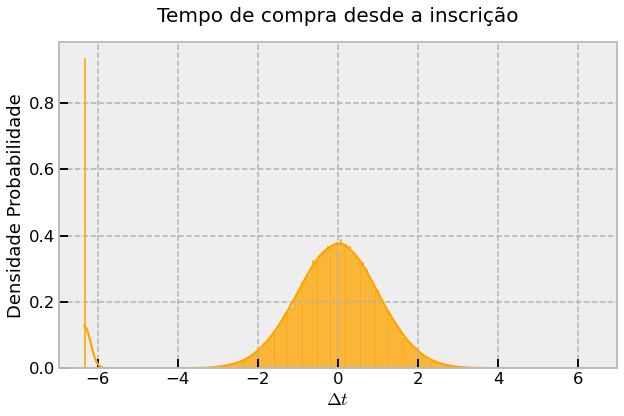

In [43]:
plt.figure(figsize=(10,6))
plt.title('Tempo de compra desde a inscrição', fontsize=20, pad=20 )
ax = sns.histplot(data = transacoes, x='tempo', stat='density', kde=True, color='orange', alpha=0.9)
ax.set_ylabel('Densidade Probabilidade')
ax.set_xlabel(r'$\Delta t$')

ax;

Agora vamos selecionar todas as variáveis que não são `pais` e `fraude`:


In [44]:
one_hot_encoded = [feature for feature in transacoes.columns if 'pais' not in feature and feature != 'fraude']
one_hot_encoded


['tempo', 'media_id']

In [45]:
for variavel in one_hot_encoded:
    transacoes[variavel] = min_max_scale(transacoes[variavel])
    

Definindo variaveis de interesse:

In [46]:
x = transacoes[[variavel for variavel in transacoes.columns if variavel != 'fraude']]
y = transacoes['fraude']

In [47]:
x.to_csv('./dados/features.csv', index=False)
y.to_csv('./dados/target.csv', index=False)

# Feature importance 

Agora vou fazer uma seleção através de um algorítmo de extração de variáveis do Sci-kit Learn chamada `ExtraTressClassifier`

```python
sklearn.ensemble.ExtraTreesClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
```

> An extra-trees classifier. This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [48]:
from sklearn.ensemble import ExtraTreesClassifier

In [49]:
%%time

# isntancia o estimador
extra_trees_classifier = ExtraTreesClassifier()

# ajusta o estimador
_ = extra_trees_classifier.fit(x,y)

resultados_extra_trees_classifier = pd.DataFrame()

# Adicionando os resultados num dataframe
resultados_extra_trees_classifier['features'] = x.columns
resultados_extra_trees_classifier['importancia'] = extra_trees_classifier.feature_importances_



CPU times: user 1min 17s, sys: 223 ms, total: 1min 17s
Wall time: 1min 17s


In [50]:
# Aqui será selecionadas as variaveis cuja importancia é acima da média
resultados_extra_trees_classifier[
    resultados_extra_trees_classifier.importancia > np.mean(resultados_extra_trees_classifier.importancia)
].sort_values(by='importancia', ascending=False)

,features,importancia
0,tempo,0.660819
1,media_id,0.333621


Dessa forma podemos concluir que numericamente as features mais importantes sãa `tempo` e `media_id`.

# Métricas de avaliação

## Matriz de Confusão

Existem 4 métricas importantes de avaliação, *precisão ou valor preditivo positivo, revocação (recall) ou sensibilidade, F1 e acurácia*. Esses conceitos são mais fáceis de entender utilizando uma matriz chamada **matriz de confusão**, ela tem a seguinte forma:

$$\begin{bmatrix}
    a_{00} & a_{01} \\
    a_{10} & a_{11} \\
\end{bmatrix} = 
\begin{bmatrix}
    \color{blue}{TN} & \color{darkorange}{FN} \\
    \color{darkorange}{FP} & \color{blue}{TP} \\
\end{bmatrix}
$$

Quando falamos de precisão e revocação existem alguns termos que precisam ser definidos:

> **Verdadeiro Negativo** ($\color{blue}{TN}$): Predição correta, dado que o valor verdadeiro é negativo. (elemento $a_{00}$)

> **Verdadeiro Positivo** ($\color{blue}{TP}$): Predição correta, dado que o valor verdadeiro é positivo. (elemento $a_{11}$)

> **Falso positivo** ($\color{darkorange}{FP}$): Predição errada, dado o valor verdadeiro que é positivo. (elemento $a_{10}$)

> **Falso Negativo** ($\color{darkorange}{FN}$): Predição errada, dado o valor verdadeiro que é negativo. (elemento $a_{01}$)

A métrica mais conhecida é a acurrácia, **indica dentre todas amostras quantas o modelo fez uma predição correta**, pode ser calculada através da expreção: 

$$\text{Acurácia } = \frac{\color{blue}{\text{Verdadeiro Positivo} + \text{Verdadeiro Negativo}}}{\color{blue}{\text{Verdadeiro Positivo}} +\color{darkorange}{\text{Falso Positivo}} + \color{blue}{\text{Verdadeiro Negativo}} +\color{darkorange}{\text{Falso Negativo}}},$$

não se preocupe em decorar a formula, o ponto chave é entender de forma ampla o quanto o modelo se saiu bem, pois geralmente quando a acurácia de um modelo já esta ruim é um forte indicador de que as outras métricas estão falhando.

A **precisão é um indicador da capacidade do modelo acertar, ou seja, de não rotular um como positivo algo que é negativo** e para calcular a precisão usamos a relação:

$$\text{Precisão} = \frac{\color{blue}{\text{Verdadeiro Positivo}}}{\color{blue}{\text{Verdadeiro Positivo}}+\color{darkorange}{\text{Falso Positivo}}}$$

**Ja o Recall ou sensiblidade é um indicador da capacidade do modelo não rotular como falso algo que é positivo** e pode ser calculado através da relação:

$$\text{Sensiblidade} = \frac{\color{blue}{\text{Verdadeiro Positivo}}}{\color{blue}{\text{Verdadeiro Positivo}}+\color{darkorange}{\text{Falso Negativo}}}$$


**A métrica chamada de $F1$-Score é uma média harmônica entre a precisão e a sensbilidade do modelo**. A vantagem dela é que consegue ponderar quando as duas métricas estão boas e tende a ser deslocada pra baixo quando a precisão ou a sensiblidade estão ruins. Pode ser calculada através da expressão:

$$\text{F1-Score} = 2\Big(\frac{\text{Precisão }\times\text{ Sensiblidade}}{\text{ Precisão } + \text{ Sensiblidade}}\Big)$$

## Curva ROC e área AUC

A curva ROC (*Receiver operating characteristic*) ou curva característica é representação da razão TPR(True Positive Rate) em função da razão TNR (True Negative Rate), para vários valores do limiar de classificação. As expressões são:

$$ TPR = \frac{TP}{TP+FN} $$

$$TNR = \frac{TN}{TN+FP}$$
 
O TPR é também conhecido como sensibilidade (ou taxa de verdadeiros positivos), e TNR a especificidade ou taxa de falsos positivos.

Como foi dito ROC é uma curva, e geralmente não é intuitivo trabalhar com linhas, então surje a área sob uma curva chadama de AUC (*Area Under Curve*) que é um valor escalar e mede o desempenho geral de um classificador binário segundo [Hanley e McNeil (1982)](https://doi.org/10.1148/radiology.143.1.7063747).

**O valor de AUC está dentro do intervalo $[0.5,1.0]$, onde o valor mínimo representa o desempenho de um classificador aleatório e o valor máximo corresponderia a um classificador perfeito (por exemplo, com uma taxa de erro de classificação equivalente a zero).**

O AUC é uma medida geral bem robusta para avaliar o desempenho dos classificadores de pontuação porque seu cálculo se baseia na curva ROC completa e, portanto, envolve todos os limites de classificação possíveis. A AUC é normalmente calculada adicionando áreas trapezoidais sucessivas abaixo da curva ROC. A abaixo mostra as curvas ROC para dois classificadores de pontuação A e B. Neste exemplo, o classificador A tem um valor de AUC maior do que o classificador B, justamente porque a curva se aproxima do eixo *True Positive Rate* logo ela  tem uma sensibilidade maior das quantidades de falsos positivos e falsos negativos:

<img src='https://media.springernature.com/lw785/springer-static/image/prt%3A978-1-4419-9863-7%2F1/MediaObjects/978-1-4419-9863-7_1_Part_Fig1-209_HTML.gif'>

> Referência da imagem: https://link.springer.com/referenceworkentry/10.1007%2F978-1-4419-9863-7_209

Ou seja, **a métrica AUC seŕa o nosso indicador de qualidade e quanto maior o AUC mais capaz de identificar os falsos positivos e falsos negativos o modelo será**. A métrica ROC é equivalente a aplicar o teste não paramétrico de Mann-Whitney-U às probabilidades de classificar os eventos que realmente ocorreram com aqueles que não ocorreram, como demonstram os pesquisadores S. J. Mason e N. E. Graham em [*Areas beneath the relative operating characteristics (ROC) and relative operating levels (ROL) curves: Statistical significance and interpretation*](https://doi.org/10.1256/003590002320603584)


## Forma de obter as métricas e gráficos 


O módulo `SKlearn` tem uma função que executa uma rotina para o cálculo a curva ROC e consequentemente o cálculo da área AUC e também tem uma função chamada [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report) que retornar a precisão e a revocação, além de algumas informações extras como [F1-score](https://en.wikipedia.org/wiki/F-score). 

Caso você esteja interessado em alguma métrica específica pode consultar o módulo metrics do Sci-kit Learn:

> `sklearn.metrics`: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

# Algortímos de detecção de anomalias

Existem duas formas de abordar a **detecção de anomalias**, a primeira é a forma supervisionada e a segunda é a não supervisionada. Mas antes de usar o algorítmo vou importar alguns módulos importantesm. O `RobustScaler` que faz uma seleção robusta de amostras descartando alguns outliers, `train_test_split` para fazer a seleção entre dados de treino e teste, `GridSearchCV` é uma tecnica de variar hiperparâmetros de um modelo através de uma grade com o objetivo de encontrar o modelo mais ajustado ao problema. As métricas de avaliação são `classification_report` que indica precisão, revocação e f1-score, `roc_auc_score` e a `roc_curve` metricas já explicadas anteriormente.


In [51]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve 
from sklearn.metrics import f1_score

## Definindo semente aleatória
```python
>>> np.random.randint(0, 2**32)
613844336
```

In [52]:
semente = 613844336

## Dividindo dados em treito e teste

In [53]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size = 0.75, random_state = semente)

## Algorítmo supervisionado

O algorítmo supervisionado é o `IsolationForest`, ele basicamente vai criar um conjunto de 100 estimadores onde irá isolar algumas observações e selecionaraá aleatoriamente uma variável e, em seguida, selecionar aleatoriamente um valor de divisão entre os valores máximo e mínimo da variável selecionado. Este algorítmo retorna $1$ quando a operação é considerada normal e $-1$ quando é considerada anômala, então precisamos transformar nossos targets onde $0$ é uma transação normal e $1$ uma transação fraudulenta.




In [54]:
print('Antes da mudança de target: ',y_treino.unique())
y_treino = y_treino.apply(lambda x: 1 if x == 0 else -1)
print('Depois da mudança de target: ',y_treino.unique())

Antes da mudança de target:  [0 1]
Depois da mudança de target:  [ 1 -1]


In [55]:
print('Antes da mudança de target: ',y_teste.unique())
y_teste = y_teste.apply(lambda x: 1 if x == 0 else -1)
print('Depois da mudança de target: ',y_teste.unique())

Antes da mudança de target:  [1 0]
Depois da mudança de target:  [-1  1]


Agora vamos instanciar o modelo 

In [56]:
from sklearn.ensemble import IsolationForest

In [57]:
isolation_forest = IsolationForest(max_samples='auto', contamination= 0.095, random_state = semente)

Como eu já disse anteriormente será definido uma grade de hiperparâmetros para ser fornecida ao `GridSearchCV`:

In [58]:
params_grid = {
    'n_estimators' : [100, 150, 200, 250, 300, 350, 400, 450, 500]
}

Agora vamos utilizar o GridSearchCV efetivamente:

In [59]:
classificador = GridSearchCV(isolation_forest, param_grid = params_grid,
                             cv = 5, n_jobs = 10, scoring='f1', verbose=10)

Agora vamos ajustar o modelo aos dados de treino e teste, **esse processo pode demorar**:

In [ ]:
%%time
_ = classificador.fit(x_treino, y_treino)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
